In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import base64

#### Downloading the dataset from Kaggle
From Kaggle we are downloading the dataset. Installing Kaggle is the first step to get the dataset. kaggle.json file which has API token is copied from Kaggle website and placed in the appropriate local directory.

In [ ]:
!pip install kaggle

In [ ]:
#Downloading the dataset from Kaggle using API and json files
!mkdir .kaggle
!touch .kaggle/kaggle.json

api_token = {"username":"USERNAME","key":"API_KEY"}

import json
import zipfile
import os
with open('/home/jupyterlab/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /home/jupyterlab/.kaggle/kaggle.json

In [ ]:
#Downloading the dataset
!kaggle datasets download -d sobhanmoosavi/us-accidents

As the Data in a zipped format we will unzipping, extracting the data from the set and converting it as Dataframe.

In [ ]:
#since the file is in zipped format we will unzip the file using below command
from zipfile import ZipFile

In [ ]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('us-accidents.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [2]:
#Read the csv data and convert it as a Dataframe
df = pd.read_csv('US_Accidents_June20.csv')

In [3]:
#Displaying 4 records
df.head(4)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day


In [4]:
#Identifying the data types of the attributes
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [5]:
#Column Details
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
#Describing the dataset
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [7]:
#Let us identify the severity value counts
df['Severity'].value_counts()

2    2373210
3     998913
4     112320
1      29174
Name: Severity, dtype: int64

As stated this dataset is having 3.5 million records with 49 columns. Here the label is mentioned as ID and another attribute is this dataset is Severity. It has the unique values from 1 to 4. Here 1 referts to the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay) and the number of cases reported for the each severity is mentioned below.

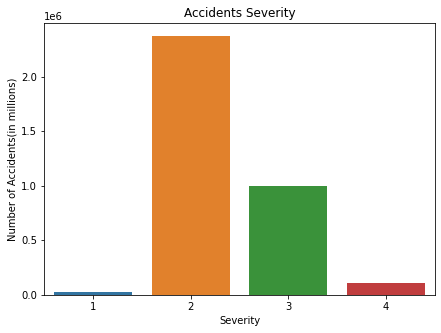

In [8]:
#Severity based accident counts
Severity = df['Severity'].value_counts()
plt.figure(figsize=(7, 5))

ax=sns.barplot(Severity.index, Severity)
ax.set(xlabel='Severity', ylabel='Number of Accidents(in millions)')
ax.set(title = 'Accidents Severity')
plt.ioff()

Now identifying the sources of this dataset and the values from the each source. Here we should see MapQuest, MapQuest-Bing and Bing sources providing the collisions.

In [9]:
df['Source'].value_counts()

MapQuest         2414301
Bing             1034799
MapQuest-Bing      64517
Name: Source, dtype: int64

We will just try to understand severity cases reported by each source to get some idea and focusing on the particular source

<AxesSubplot:title={'center':'Severity Count by Sources'}, xlabel='Source'>

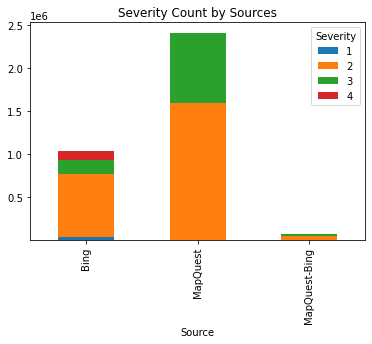

In [10]:
#Number of accidents reported by the sources
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
     columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

The above stacked bar chart shows that two sources reported totally different proportions of accidents. MapQuest reported less accidents with severity level 4 which can not be seen in the plot itself, whereas Bing reported almost the same number of level 4 accidents as level 2. Meanwhile, MapQuest reported much more level 3 accidents than Bing in terms of proportion. These differences may be due to the different kinds of accidents they tend to collect or the different definitions of severity level, or the combination of them. Bing seems to have a clear and strict threshold for severity level 4, cases of which nevertheless only account for a tiny part of the whole dataset. .

It is quite hard to choose one source so we are going with handle the data from Bing source

#### Data Preparation

#### Adding and Modifying the features
Converting Start_Time, End_Time and Weather_Timestamp to the real date time columns. Also simplying the Wind_Direction and Weather_Condition features to avoid complications.
Also splitting up the Start_Time feature into Day, Month, Year, Weekday, Hour and Minute.

In [11]:
#We can make the start and End Times real datetime columns
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

In [12]:
#We will be using the data from bing source alone
df_new = df.loc[df['Source']=="Bing"]
df_new = df_new.drop(['Source'], axis=1)

In [13]:
df_new.shape

(1034799, 48)

In [14]:
df_new['Severity'].value_counts()

2    740299
3    160904
4    105490
1     28106
Name: Severity, dtype: int64

In [ ]:
# Copying the dataframe to local for future use
df_new.to_csv('/resources/data/Cleaned_data.csv')

#/jupyterlab/jupyterlab/US_Accidents_June20.csv

#### Dropping Features
Features 'ID' doesn't provide any useful information about accidents. 'TMC', 'Description','Distance(mi)', 'End_Time' (we have start time), 'Duration', 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has already happened and hence cannot be predictors for serious accident prediction. Also we will be dropping the Description attributes which is not having useful information.

In [15]:
#Dropping the attributes
df_new = df_new.drop(['TMC','Description','Distance(mi)', 'End_Time','End_Lat', 'End_Lng','ID'], axis=1)

Let us move on to identify the unique values for each features

In [16]:
#Identifying some of the catergorical Features with the values
categories = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in categories:
  print(i,df[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


We could see Country and the Turning loop features are having one unique value. So we can drop them. As number and Wind_chill are not impacting the severity based on the previous observations let us drop those columns.

In [17]:
df_new = df_new.drop(['Country','Turning_Loop'], axis=1)

In [18]:
df_new = df_new.drop(['Number','Wind_Chill(F)'], axis=1)

In [20]:
#Add day's column in our data.
df_new['Day'] = df_new['Start_Time'].dt.day
# Add year column in the data
df_new['Year'] = df_new['Start_Time'].dt.year
#Add Week_day column in the data.
df_new['Weekday'] = df_new['Start_Time'].dt.weekday
#Add Month column in the data.
df_new['Month'] = df_new['Start_Time'].dt.month
#Add Hour column in the data.
df_new['Hour'] = df_new['Start_Time'].dt.hour
#Add minutes column in the data
df_new['Minute']=df_new['Hour']*60.0+df_new["Start_Time"].dt.minute
df_new.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute


In [21]:
df_new.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Year,Weekday,Month,Hour,Minute
2478818,3,2016-02-08 00:37:08,40.10891,-83.09286,Outerbelt E,R,Dublin,Franklin,OH,43017,...,Night,Night,Night,Night,8,2016,0,2,0,37.0
2478819,2,2016-02-08 05:56:20,39.86542,-84.06280,I-70 E,R,Dayton,Montgomery,OH,45424,...,Night,Night,Night,Night,8,2016,0,2,5,356.0
2478820,2,2016-02-08 06:15:39,39.10266,-84.52468,I-75 S,R,Cincinnati,Hamilton,OH,45203,...,Night,Night,Night,Day,8,2016,0,2,6,375.0
2478821,2,2016-02-08 06:15:39,39.10148,-84.52341,US-50 E,R,Cincinnati,Hamilton,OH,45202,...,Night,Night,Night,Day,8,2016,0,2,6,375.0
2478822,2,2016-02-08 06:51:45,41.06213,-81.53784,I-77 N,R,Akron,Summit,OH,44311,...,Night,Night,Day,Day,8,2016,0,2,6,411.0


In [22]:
#Converting weekdays with names
df_new['Weekday']= df_new["Weekday"].replace([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
df_new.Weekday.head()
df_new.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Day,Year,Weekday,Month,Hour,Minute
2478818,3,2016-02-08 00:37:08,40.10891,-83.09286,Outerbelt E,R,Dublin,Franklin,OH,43017,...,Night,Night,Night,Night,8,2016,Monday,2,0,37.0
2478819,2,2016-02-08 05:56:20,39.86542,-84.06280,I-70 E,R,Dayton,Montgomery,OH,45424,...,Night,Night,Night,Night,8,2016,Monday,2,5,356.0
2478820,2,2016-02-08 06:15:39,39.10266,-84.52468,I-75 S,R,Cincinnati,Hamilton,OH,45203,...,Night,Night,Night,Day,8,2016,Monday,2,6,375.0
2478821,2,2016-02-08 06:15:39,39.10148,-84.52341,US-50 E,R,Cincinnati,Hamilton,OH,45202,...,Night,Night,Night,Day,8,2016,Monday,2,6,375.0
2478822,2,2016-02-08 06:51:45,41.06213,-81.53784,I-77 N,R,Akron,Summit,OH,44311,...,Night,Night,Day,Day,8,2016,Monday,2,6,411.0


#### Wind Direction
Let us try to find the unique Wind_Direction and then go for simplification of values.

In [23]:
df_new.Wind_Direction.unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [24]:
df_new.loc[df_new['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df_new.loc[(df_new['Wind_Direction']=='West')|(df_new['Wind_Direction']=='WSW')|(df_new['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df_new.loc[(df_new['Wind_Direction']=='South')|(df_new['Wind_Direction']=='SSW')|(df_new['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df_new.loc[(df_new['Wind_Direction']=='North')|(df_new['Wind_Direction']=='NNW')|(df_new['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df_new.loc[(df_new['Wind_Direction']=='East')|(df_new['Wind_Direction']=='ESE')|(df_new['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df_new.loc[df_new['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df_new['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


#### Weather Condition
We could see many unique values in the Weather conditions. Let us simplify the Weather condition values.

In [25]:
weather ='!'.join(df_new['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic Ash', 'Widespread Dust', 'Windy', 'Wintry 

In [26]:
df_new['Clear'] = np.where(df_new['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df_new['Cloud'] = np.where(df_new['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df_new['Rain'] = np.where(df_new['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df_new['Heavy_Rain'] = np.where(df_new['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df_new['Snow'] = np.where(df_new['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df_new['Heavy_Snow'] = np.where(df_new['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df_new['Fog'] = np.where(df_new['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)

# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
  df_new.loc[df['Weather_Condition'].isnull(),i] = df_new.loc[df['Weather_Condition'].isnull(),'Weather_Condition']

df_new.loc[:,['Weather_Condition'] + weather]

#df = df.drop(['Weather_Condition'], axis=1)

,Weather_Condition,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog
2478818,Light Rain,0,0,1,0,0,0,0
2478819,Light Rain,0,0,1,0,0,0,0
2478820,Overcast,0,1,0,0,0,0,0
2478821,Overcast,0,1,0,0,0,0,0
2478822,Overcast,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3513612,Fair,0,0,0,0,0,0,0
3513613,Fair,0,0,0,0,0,0,0
3513614,Partly Cloudy,0,1,0,0,0,0,0
3513615,Fair,0,0,0,0,0,0,0


In [27]:
df_new.dtypes

Severity                          int64
Start_Time               datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Street                           object
Side                             object
City                             object
County                           object
State                            object
Zipcode                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object
Amenity                            bool
Bump                               bool
Crossing                           bool
Give_Way                           bool


We will be converting few types to integer for our convenience.

In [28]:
df_new[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway']] = df_new[['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway']].astype(int)
df_new[['Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']] =  df_new[['Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']].astype(int)                   

In [ ]:
df_new[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']] = df_new[['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']].replace(['Night','Day'],[0,1])

In [31]:
df_new[['Side']] = df_new[['Side']].replace(['L','R'],[0,1])
df_new['Side'].unique

<bound method Series.unique of 2478818    1
2478819    1
2478820    1
2478821    1
2478822    1
          ..
3513612    1
3513613    1
3513614    1
3513615    1
3513616    1
Name: Side, Length: 1034799, dtype: int64>

#### Handling the missing values
Identifying the Nulls and the NaN values.

In [32]:
#Lets identify columns with Nulls and NaNs.
df_new.isnull().sum()

Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Street                        0
Side                          0
City                         61
County                        0
State                         0
Zipcode                     759
Timezone                   1819
Airport_Code               2619
Weather_Timestamp         15553
Temperature(F)            24709
Humidity(%)               25978
Pressure(in)              20736
Visibility(mi)            26851
Wind_Direction            23401
Wind_Speed(mph)          110416
Precipitation(in)        481372
Weather_Condition         27179
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_

In [33]:
df_new.isna().sum()

Severity                      0
Start_Time                    0
Start_Lat                     0
Start_Lng                     0
Street                        0
Side                          0
City                         61
County                        0
State                         0
Zipcode                     759
Timezone                   1819
Airport_Code               2619
Weather_Timestamp         15553
Temperature(F)            24709
Humidity(%)               25978
Pressure(in)              20736
Visibility(mi)            26851
Wind_Direction            23401
Wind_Speed(mph)          110416
Precipitation(in)        481372
Weather_Condition         27179
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_

Counts of missing values in some features are much smaller compared to the total sample. It is convenient to drop rows with missing values in these columns. Drop NAs by these features: 'City','Zipcode','Airport_Code','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight' having the less values compared with other features. Let us drop them.

In [35]:
df_new = df_new.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [36]:
df_new.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Day',
       'Year', 'Weekday', 'Month', 'Hour', 'Minute', 'Clear', 'Cloud', 'Rain',
       'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog'],
      dtype='object')

#### Value Imputation
Most of the rest columns only have small missing part that can be filled. we will be performing mean, mode, median to fill up rest of the features with some values.

In [37]:
#Define a funcation impute median
def impute_median(series):
    return series.fillna(series.median())

def impute_mean(series):
    return series.fillna(series.mean())

Updating the weather_attributes with their median values

In [38]:
#df_new.Number = df_new['Number'].transform(impute_mean)
df_new['Temperature(F)'] = df_new['Temperature(F)'].transform(impute_median)
#df_new['Wind_Chill(F)'] = df_new['Wind_Chill(F)'].transform(impute_median)
df_new['Humidity(%)'] = df_new['Humidity(%)'].transform(impute_median)
df_new['Pressure(in)'] = df_new['Pressure(in)'].transform(impute_median)
df_new['Visibility(mi)'] = df_new['Visibility(mi)'].transform(impute_median)
df_new['Wind_Speed(mph)'] = df_new['Wind_Speed(mph)'].transform(impute_median)
df_new['Precipitation(in)'] = df_new['Precipitation(in)'].transform(impute_median)
df_new.isnull().sum()

Severity                     0
Start_Time                   0
Start_Lat                    0
Start_Lng                    0
Street                       0
Side                         0
City                         0
County                       0
State                        0
Zipcode                      0
Timezone                     0
Airport_Code                 0
Weather_Timestamp        12934
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           20782
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        24557
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_

In [ ]:
df_new['Weather_Condition'].fillna(str(df_new['Weather_Condition'].mode().values[0]), inplace=True)
df_new['Weather_Timestamp'].fillna(str(df_new['Weather_Timestamp'].mode().values[0]), inplace=True)
df_new['Wind_Direction'].fillna(str(df_new['Wind_Direction'].mode().values[0]), inplace=True)
df_new['Clear'].fillna(str(df_new['Clear'].mode().values[0]), inplace=True)
df_new['Cloud'].fillna(str(df_new['Cloud'].mode().values[0]), inplace=True)
df_new['Rain'].fillna(str(df_new['Rain'].mode().values[0]), inplace=True)
df_new['Snow'].fillna(str(df_new['Snow'].mode().values[0]), inplace=True)
df_new['Heavy_Snow'].fillna(str(df_new['Heavy_Snow'].mode().values[0]), inplace=True)
df_new['Heavy_Rain'].fillna(str(df_new['Heavy_Rain'].mode().values[0]), inplace=True)
df_new['Fog'].fillna(str(df_new['Fog'].mode().values[0]), inplace=True)
df_new.isnull().sum()

In [41]:
df_new.isnull().sum()

Severity                 0
Start_Time               0
Start_Lat                0
Start_Lng                0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
D

### Data Analysis and Visualization
#### Visualization based on State

<AxesSubplot:>

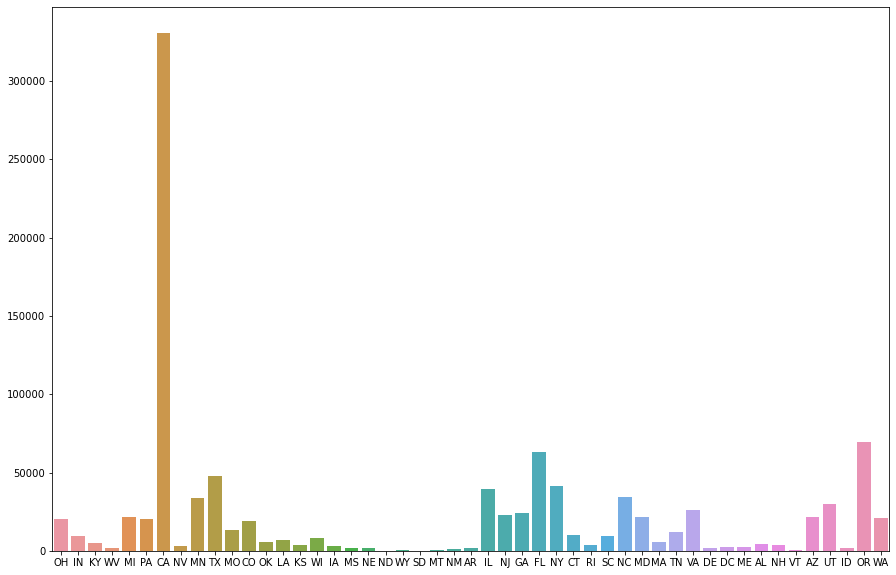

In [45]:
#Collision based on the state: 
states = df_new.State.unique()
state_counts=[]
for i in df_new.State.unique():
    state_counts.append(df_new[df_new['State']==i].count()['Severity'])

fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(states,state_counts)

In [46]:
#Identifying top severity states
df_top_Severity_State = df_new.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()
df_top_Severity_State.head()

,State,Severity
0,CA,2.094040
1,OR,2.104107
2,ME,2.105530
3,UT,2.115999
4,NH,2.117399


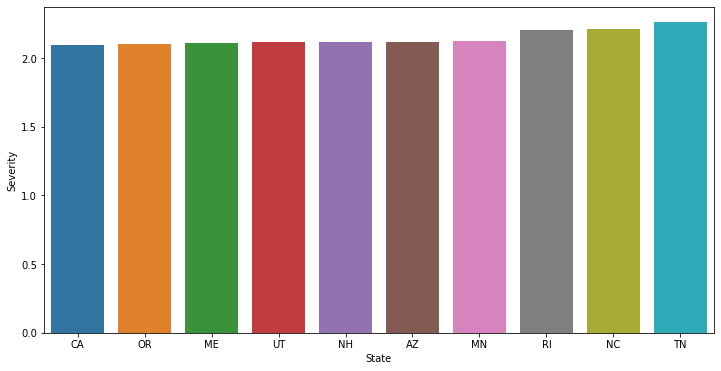

In [47]:
# plotting the states with high severity
plt.figure(figsize=(12,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(10))
plt.ioff()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


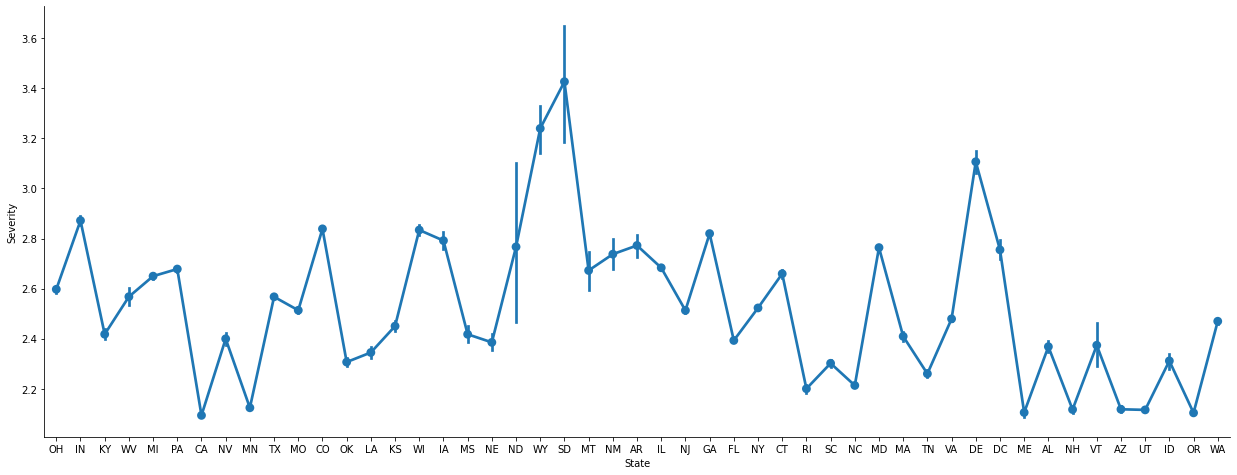

In [48]:
sns.factorplot('State','Severity',data=df_new)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

#### Accidents based on week

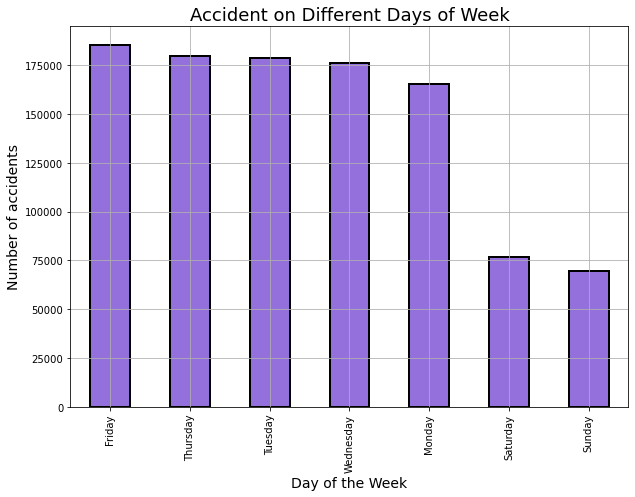

In [50]:
fig, ax=plt.subplots(figsize=(10,7))
df_new['Weekday'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,color='mediumpurple')
plt.xlabel('Day of the Week',fontsize=14)
plt.ylabel('Number of accidents',fontsize=14)
ax.tick_params(labelsize=10)
plt.title('Accident on Different Days of Week',fontsize=18)
plt.grid()
plt.ioff()

#### Accident severity based on Timezone

In [52]:
df_new.Timezone.unique()

array(['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain'],
      dtype=object)

In [53]:
df_new["Timezone"].value_counts()

US/Pacific     425018
US/Eastern     350665
US/Central     180014
US/Mountain     76422
Name: Timezone, dtype: int64

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


In [55]:
df_Timezone =  df.groupby('Timezone', axis=0).sum()
df_Timezone.head()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Timezone,,,,,,,,,,,,,,,,,,,,,
US/Central,135750881.0,1951184,2.975529e+07,-7.799810e+07,6.888699e+06,-1.660240e+07,205545.915076,1.851144e+09,5.114178e+07,1.979994e+07,...,3450.0,52076.0,1121.0,7166.0,27.0,14979.0,15943.0,294.0,191307.0,0.0
US/Eastern,235944828.0,3543717,5.438327e+07,-1.179089e+08,1.301684e+07,-2.776617e+07,526078.719963,2.292160e+09,8.941552e+07,3.573346e+07,...,4558.0,105404.0,1440.0,9957.0,105.0,28344.0,12519.0,444.0,286461.0,0.0
US/Mountain,25747432.0,460679,7.404156e+06,-2.204755e+07,2.916956e+06,-8.420125e+06,93546.109021,4.085815e+08,1.197724e+07,6.294411e+06,...,515.0,8508.0,1139.0,1622.0,3.0,2533.0,5304.0,126.0,58658.0,0.0
US/Pacific,117785694.0,2257467,3.670942e+07,-1.182456e+08,1.596967e+07,-5.096584e+07,161174.732961,2.886272e+09,6.101063e+07,2.629365e+07,...,1041.0,118234.0,684.0,12430.0,49.0,24463.0,18209.0,537.0,87029.0,0.0


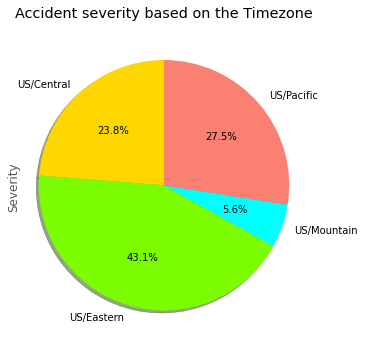

In [56]:
color_list = ['gold', 'lawngreen', 'aqua', 'salmon']
df_Timezone['Severity'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,      # start angle 90° (Africa)
                            colors = color_list,
                            shadow=True,       # add shadow      
                            )

plt.title('Accident severity based on the Timezone')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

#### Based on Weather_Condition

In [57]:
df_new['Weather_Condition'].value_counts()

Fair                        250169
Clear                       180224
Mostly Cloudy               140392
Partly Cloudy               101674
Overcast                     87851
                             ...  
Low Drifting Snow                1
Drifting Snow                    1
Thunder and Hail                 1
Thunder and Hail / Windy         1
Heavy Freezing Drizzle           1
Name: Weather_Condition, Length: 111, dtype: int64

In [58]:
#Identifying top Weather conditions states
df_weather_conditions = df_new.groupby('Weather_Condition').sum()
df_top_weather_condition = df_weather_conditions.sort_values('Severity', ascending = False).reset_index()
df_top_weather_condition.head()

,Weather_Condition,Severity,Start_Lat,Start_Lng,Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Hour
0,Fair,550719,9.269413e+06,-2.658925e+07,213901,16542346.8,12903610.0,7.325755e+06,2471952.65,1712118.5,...,3400,98,37065,179546.0,188722.0,200177.0,209432.0,505195823,1560818,3307906
1,Clear,443213,6.674969e+06,-1.799948e+07,158620,11259862.1,9999262.0,5.417613e+06,1789457.90,1509962.4,...,1324,27,14691,126804.0,135265.0,144240.0,151672.0,363546554,1235724,2258219
2,Mostly Cloudy,327580,5.234673e+06,-1.363369e+07,122351,9073276.0,8687045.0,4.150299e+06,1403921.80,1214589.7,...,1085,51,19550,110273.0,115703.0,121175.0,125300.0,283367243,853760,1830751
3,Partly Cloudy,233905,3.748540e+06,-1.021089e+07,88794,6711235.7,5607750.0,3.000886e+06,1029060.60,840520.3,...,794,26,13568,77871.0,82327.0,86785.0,90246.0,205221237,645613,1352844
4,Overcast,219649,3.405503e+06,-8.326026e+06,76938,4582384.3,6830430.0,2.636953e+06,773050.80,782413.3,...,589,17,6910,56902.0,62027.0,67322.0,71537.0,177230471,552859,1017596


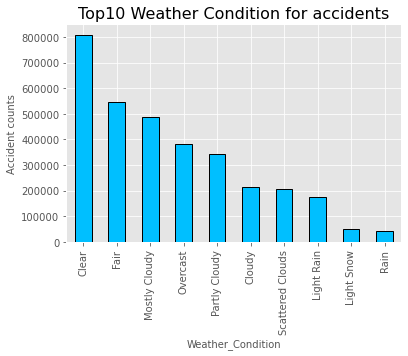

In [59]:
Weather = df_top_weather_condition['Weather_Condition'].value_counts()
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',\
                                                                            color = 'deepskyblue',align='center',linewidth=1)
plt.xlabel('Weather_Condition',fontsize=10)
plt.ylabel('Accident counts',fontsize=10)
plt.tick_params(labelsize=10)
plt.title('Top10 Weather Condition for accidents',fontsize=16)
plt.ioff()

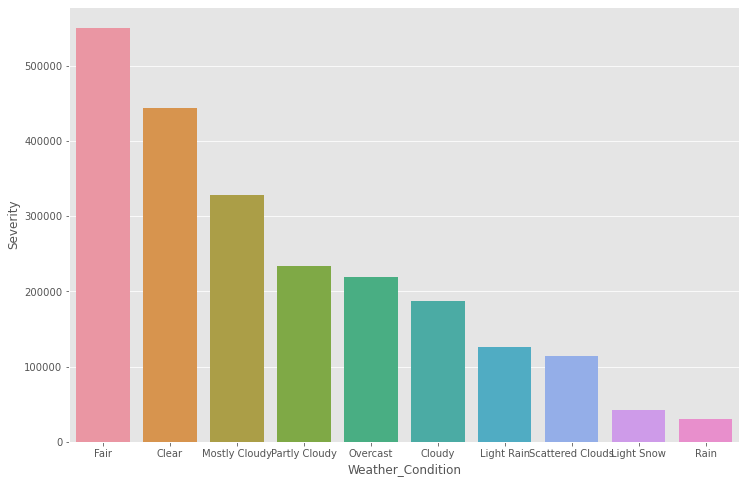

In [143]:
# plotting the states with high severity
plt.figure(figsize=(12,8))
sns.barplot(x="Weather_Condition", y = 'Severity', data = df_top_weather_condition.head(10))
plt.ioff()

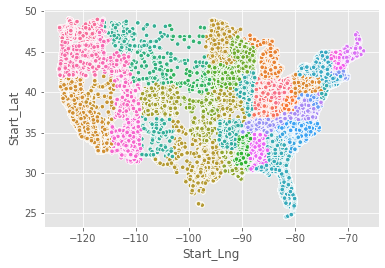

In [62]:
#Based on county
# Map of accidents, color code by county Scatter plots
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_new, hue='State', legend=False, s=20)
plt.show()

#### POI Feature Distribution

In [63]:
#Dataframe with POI features only
POI = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',\
           'Traffic_Calming','Traffic_Signal']
df_POI = df_new[POI]
POI_values = df_POI.sum(axis = 0)
POI_values

Amenity              7840
Bump                  123
Crossing            53898
Give_Way             1896
Junction           160374
No_Exit               957
Railway              8169
Roundabout              9
Station             16579
Stop                 9504
Traffic_Calming       274
Traffic_Signal     121328
dtype: int64

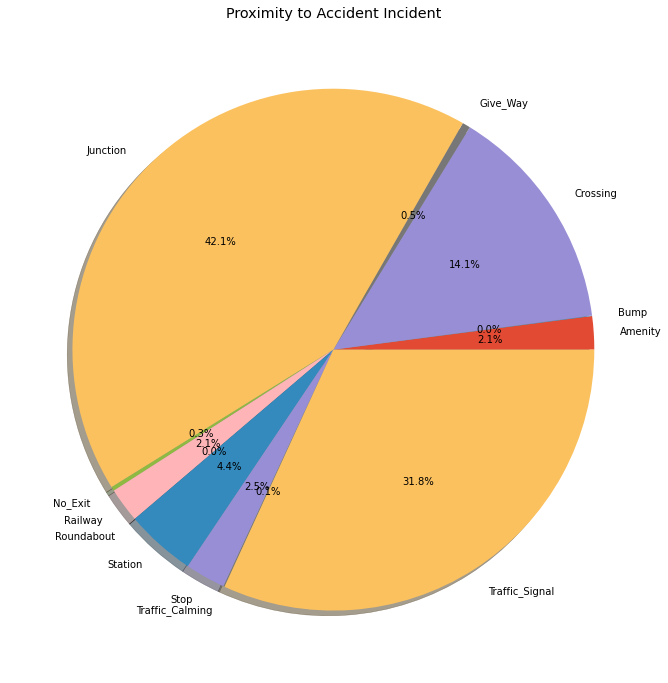

In [65]:
POI_values.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,12))
plt.ylabel('')
plt.title('Proximity to Accident Incident');

In [67]:
POD = ['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
df_POD = df_new[POD]
df_POD.head()

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2478818,0.0,0.0,0.0,0.0
2478819,0.0,0.0,0.0,0.0
2478820,0.0,0.0,0.0,1.0
2478821,0.0,0.0,0.0,1.0
2478822,0.0,0.0,1.0,1.0


In [71]:
df_new['Severity4'] = 0
df_new.loc[df_new['Severity'] == 4, 'Severity4'] = 1
df_new.Severity4.value_counts()

0    926952
1    105167
Name: Severity4, dtype: int64

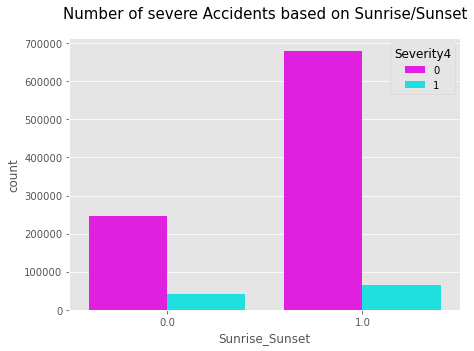

In [73]:
#Plot based on the sunrise/sunset
plt.figure(figsize=(7,5))
chart = sns.countplot(x='Sunrise_Sunset', hue='Severity4', data=df_new, palette=["magenta","cyan"])
plt.title("Number of severe Accidents based on Sunrise/Sunset", size=15, y=1.05)
plt.show()

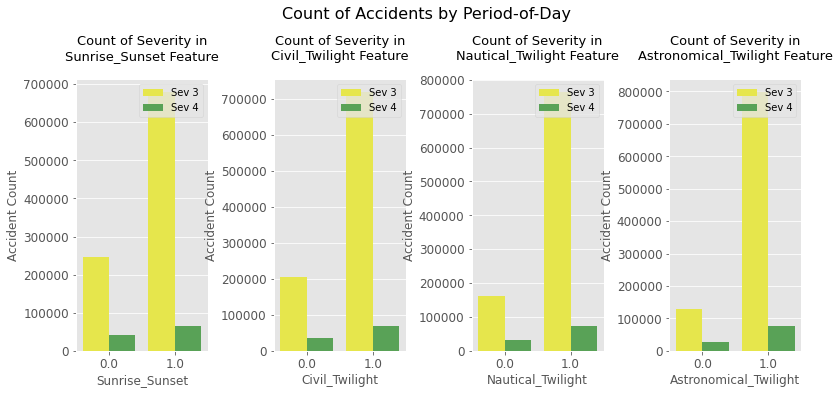

In [147]:
# After sampling need to rerun 
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(13, 5))

plt.subplots_adjust(wspace = 0.5)
for i, feature in enumerate(POD, 1):    
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_new ,palette="Set1_r")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['Sev 3', 'Sev 4'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
fig.suptitle('Count of Accidents by Period-of-Day',y=1.08, fontsize=16)
plt.show()

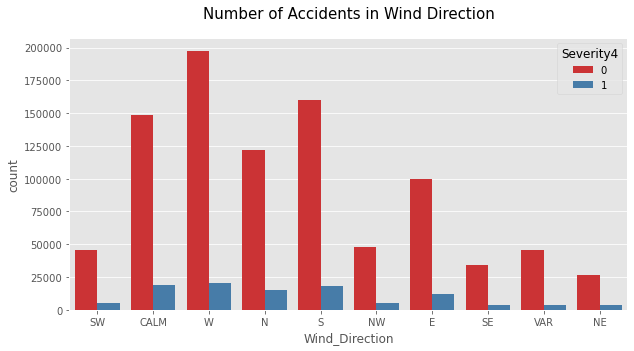

In [75]:
#Considering severe accidents
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity4', data=df_new, palette = 'Set1')
plt.title("Number of Accidents in Wind Direction", size=15, y=1.05)
plt.show()

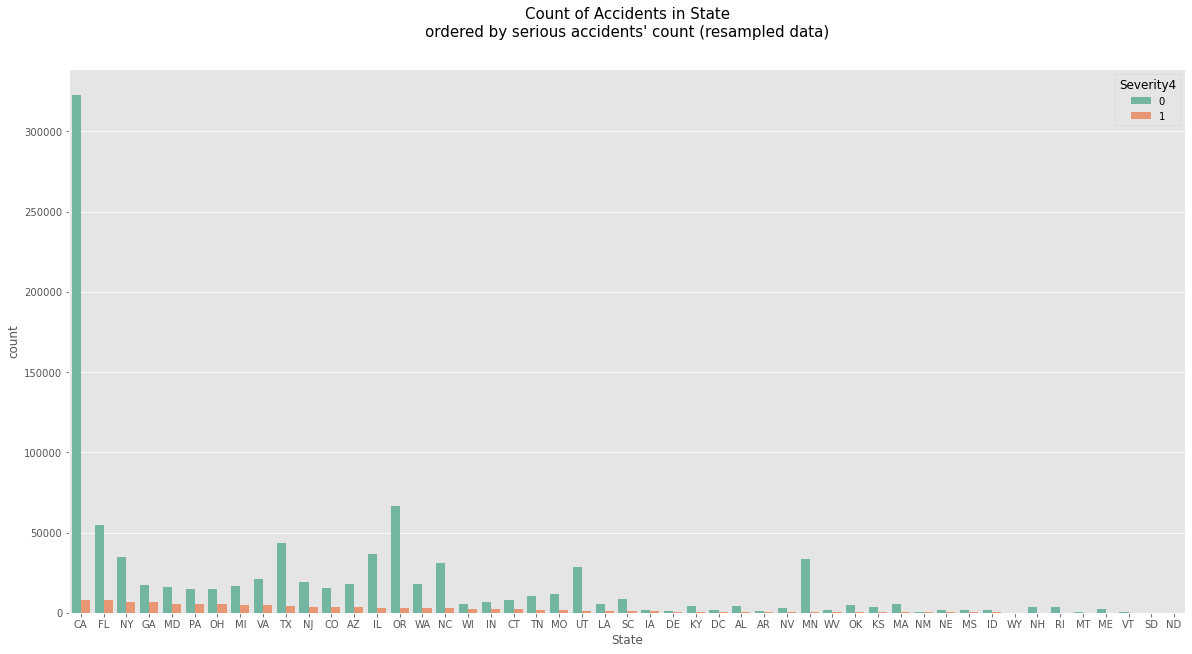

In [77]:
###After sampling need to run it
plt.figure(figsize=(20,10))
chart = sns.countplot(x='State', hue='Severity4', data=df_new ,palette="Set2", order=df_new[df_new['Severity']==4]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by serious accidents' count (resampled data)", size=15, y=1.05)
plt.show()

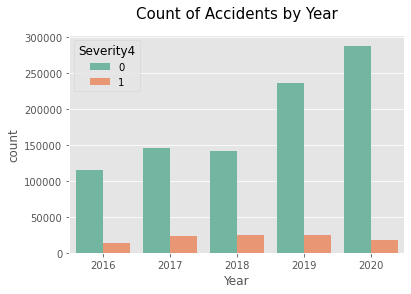

In [79]:
df_new.Year = df_new.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_new ,palette="Set2")
plt.title('Count of Accidents by Year', size=15, y=1.05)
plt.show()

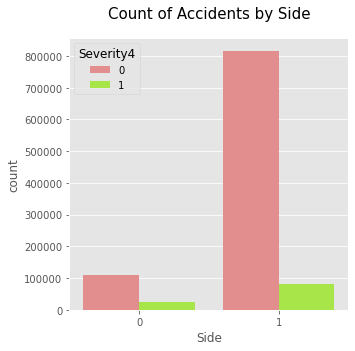

In [81]:
#plots based on the side
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity4', data=df_new,palette=["lightcoral","greenyellow"])
plt.title("Count of Accidents by Side", size=15, y=1.05)
plt.show()

#### Correlation on Weather Features
Let us go for the correlation between the weather Features.

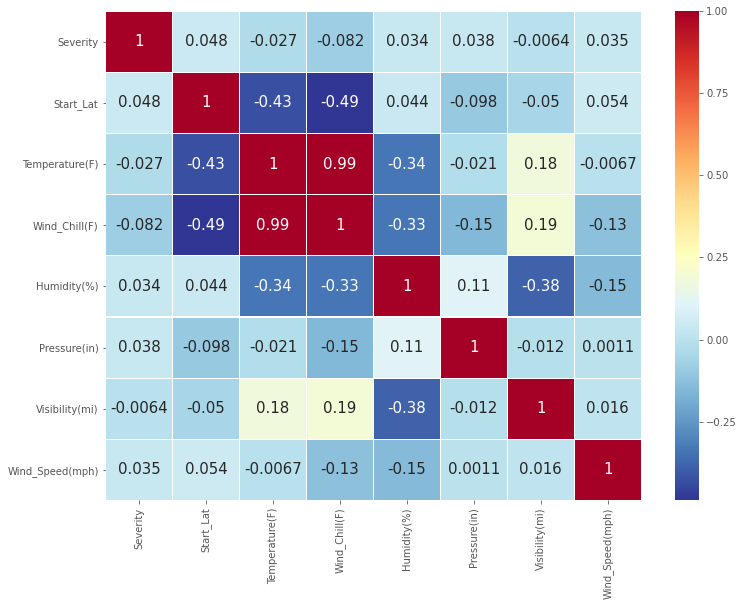

In [82]:
fig=sns.heatmap(df[['Severity','Start_Lat','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),annot=True,cmap='RdYlBu_r',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(12,9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

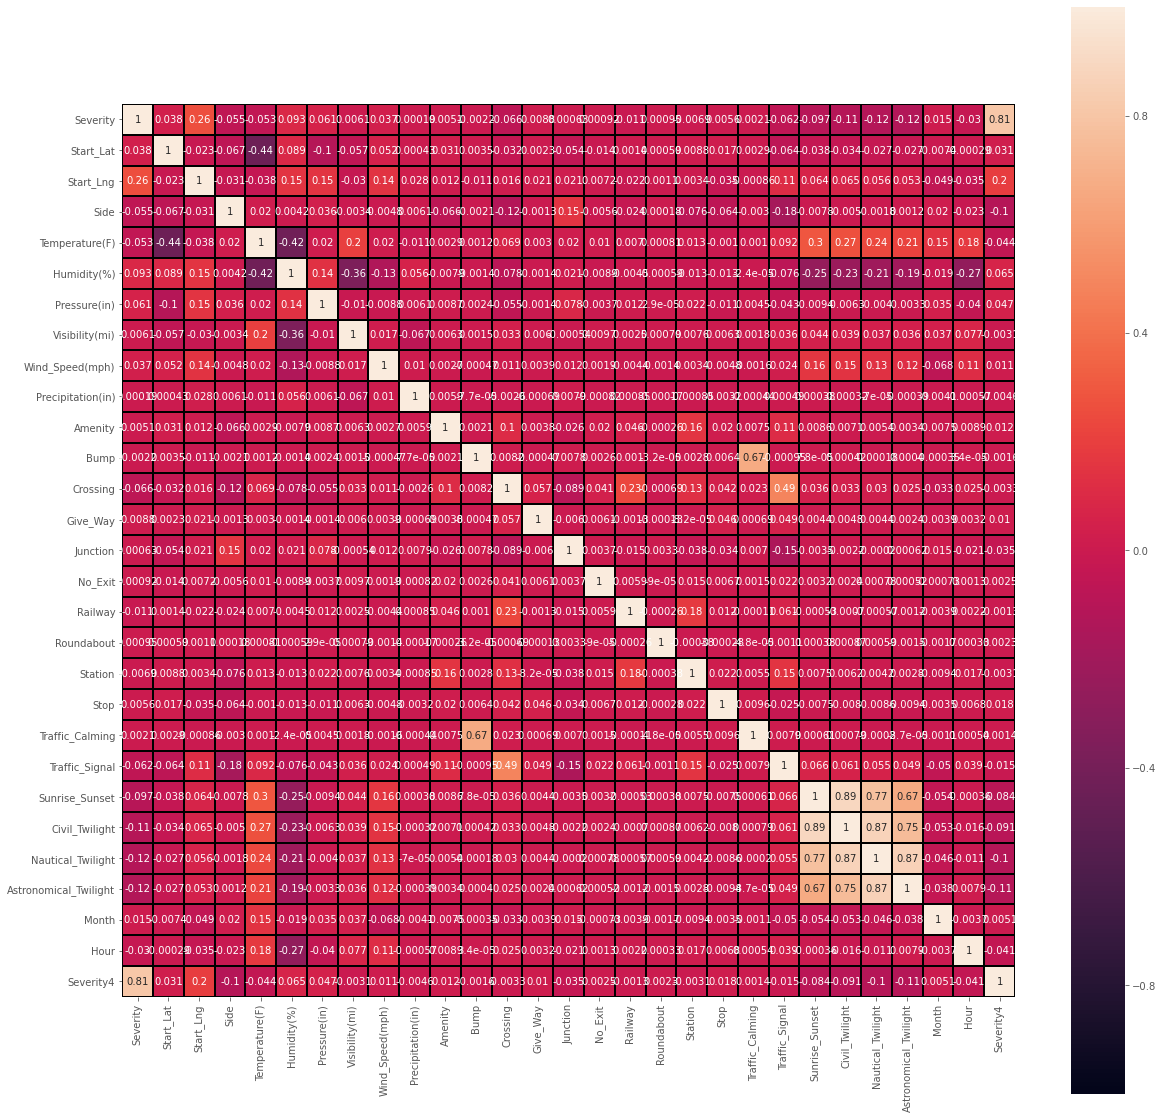

In [83]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(df_new.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [84]:
df_new.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Month,Hour,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Severity4
2478818,3,2016-02-08 00:37:08,40.10891,-83.09286,Outerbelt E,1,Dublin,Franklin,OH,43017,...,2,0,0,0,1,0,0,0,0,0
2478819,2,2016-02-08 05:56:20,39.86542,-84.06280,I-70 E,1,Dayton,Montgomery,OH,45424,...,2,5,0,0,1,0,0,0,0,0
2478820,2,2016-02-08 06:15:39,39.10266,-84.52468,I-75 S,1,Cincinnati,Hamilton,OH,45203,...,2,6,0,1,0,0,0,0,0,0
2478821,2,2016-02-08 06:15:39,39.10148,-84.52341,US-50 E,1,Cincinnati,Hamilton,OH,45202,...,2,6,0,1,0,0,0,0,0,0
2478822,2,2016-02-08 06:51:45,41.06213,-81.53784,I-77 N,1,Akron,Summit,OH,44311,...,2,6,0,1,0,0,0,0,0,0


In [88]:
#Accidents by month
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_new ,palette="Set6")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

ValueError: Set6 is not a valid palette name

<Figure size 720x360 with 0 Axes>

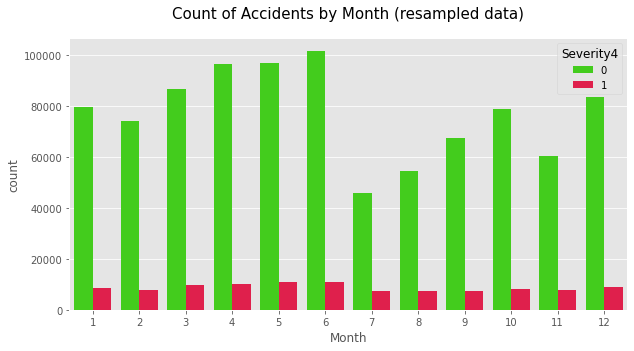

In [137]:
#Accidents by month
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_new ,palette="prism")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

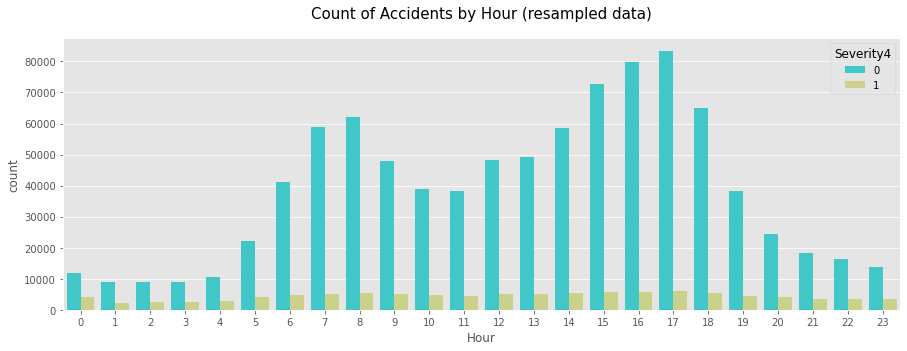

In [87]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_new ,palette="rainbow")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

In [92]:
df_new.Side.unique

<bound method Series.unique of 2478818    1
2478819    1
2478820    1
2478821    1
2478822    1
          ..
3513612    1
3513613    1
3513614    1
3513615    1
3513616    1
Name: Side, Length: 1032119, dtype: int64>

In [139]:
df_new.shape

(1032119, 48)

#### Sampling of Data
As per the previous Data Exploration, Severity 4 will be much serious than other severity levels. So mainly focussing on the Severity 4 accidents and grouping other severity accidents.
Total values: 1032119, Severity 4: 105167 Other records: 926952


In [141]:
df_new['Severity4'].value_counts()

0    926952
1    105167
Name: Severity4, dtype: int64

In [94]:
df_new.to_csv('/resources/data/Accident_data.csv')

As the Data is so unbalanced we will be performing sampling of the data for the model development and evaluation.

In [95]:
#Sampling
df_new = df_new.drop(['Severity'], axis = 1)
df_train = pd.concat([df_new[df_new['Severity4']==1].sample(100000, replace = True),
                   df_new[df_new['Severity4']==0].sample(100000)], axis=0)
print('resampled data:', df_train.Severity4.value_counts())

resampled data: 1    100000
0    100000
Name: Severity4, dtype: int64


In [96]:
df_train.dtypes

Start_Time               datetime64[ns]
Start_Lat                       float64
Start_Lng                       float64
Street                           object
Side                              int64
City                             object
County                           object
State                            object
Zipcode                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Precipitation(in)               float64
Weather_Condition                object
Amenity                           int64
Bump                              int64
Crossing                          int64
Give_Way                          int64
Junction                          int64


In [97]:
df_train.Severity4.value_counts()

1    100000
0    100000
Name: Severity4, dtype: int64

In [98]:
# resample again
df_train = pd.concat([df_train[df_train['Severity4']==1].sample(40000, replace = True), 
                   df_train[df_train['Severity4']==0].sample(40000)], axis=0)

In [100]:
df_train.head()

,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Timezone,...,Month,Hour,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Severity4
3196667,2019-01-08 06:46:02,41.750525,-87.721949,S Pulaski Rd,1,Chicago,Cook,IL,60652,US/Central,...,1,6,0,1,0,0,0,0,0,1
2563343,2016-09-08 11:54:56,40.128730,-77.349970,Centerville Rd,1,Newville,Cumberland,PA,17241,US/Eastern,...,9,11,0,1,0,0,0,0,0,1
2755782,2020-05-08 19:45:00,32.772500,-96.623630,I-635 S,1,Mesquite,Dallas,TX,75149,US/Central,...,5,19,0,0,0,0,0,0,0,1
3071127,2019-10-09 19:40:37,38.999180,-76.555660,Generals Hwy,1,Annapolis,Anne Arundel,MD,21401-6719,US/Eastern,...,10,19,0,1,0,0,0,0,0,1
2935742,2020-04-25 14:50:29,33.640220,-112.065400,N 7th St,0,Phoenix,Maricopa,AZ,85022,US/Mountain,...,4,14,0,0,0,0,0,0,0,1


In [103]:
df_train.to_csv('/resources/data/Acc_data.csv')

Features are selected based on the previous Exploratory data analysis.

In [101]:
Features = df_train[['Start_Lat','Start_Lng','Temperature(F)','Humidity(%)','Pressure(in)',\
           'Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Amenity','Bump','Crossing','Give_Way',\
           'Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',\
           'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Year','Clear','Cloud',\
           'Rain','Heavy_Rain','Fog','Heavy_Snow']]

In [102]:
X = Features
X[0:5]

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Clear,Cloud,Rain,Heavy_Rain,Fog,Heavy_Snow
3196667,41.750525,-87.721949,39.9,89.0,29.75,5.0,6.9,0.0,0,0,...,1.0,1.0,1.0,2019,0,1,0,0,0,0
2563343,40.128730,-77.349970,90.0,55.0,29.93,10.0,4.6,0.0,0,0,...,1.0,1.0,1.0,2016,0,1,0,0,0,0
2755782,32.772500,-96.623630,64.0,52.0,29.62,10.0,12.0,0.0,0,0,...,1.0,1.0,1.0,2020,0,0,0,0,0,0
3071127,38.999180,-76.555660,60.0,75.0,30.22,10.0,8.0,0.0,0,0,...,0.0,0.0,1.0,2019,0,1,0,0,0,0
2935742,33.640220,-112.065400,96.0,9.0,28.30,10.0,5.0,0.0,0,0,...,1.0,1.0,1.0,2020,0,0,0,0,0,0


In [104]:
y= df_train['Severity4']

In [105]:
y[0:5]

3196667    1
2563343    1
2755782    1
3071127    1
2935742    1
Name: Severity4, dtype: int64

In [107]:
df_train.shape

(80000, 48)

#### Model Development and Evaluation
Here using KNN Classifier, Decision Tree, Support vector machine, Logistic Regression and Random Forest Classification algroithms to predict the collison.

In [109]:
from sklearn import preprocessing
%matplotlib inline

In [110]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 8.21033284e-01,  4.45681415e-01, -1.08433591e+00,
         1.06520173e+00,  9.48707976e-02, -1.39325761e+00,
        -2.78556505e-01, -5.71811210e-02, -9.50975964e-02,
        -9.35455274e-03, -2.33908636e-01, -5.00626174e-02,
        -4.01019494e-01, -3.24207288e-02, -8.93062539e-02,
        -3.53555600e-03, -1.27008192e-01, -1.06787524e-01,
        -1.76804323e-02, -3.57526011e-01, -1.42851984e+00,
         6.35165260e-01,  5.63395575e-01,  5.02674369e-01,
         5.32361867e-01, -5.10973271e-01,  1.10211410e+00,
        -2.81683115e-01, -7.45365361e-02, -9.94195253e-02,
        -3.04278888e-02],
       [ 4.89715432e-01,  1.01994947e+00,  1.57938482e+00,
        -4.20164893e-01,  2.71820410e-01,  2.75379075e-01,
        -7.47538174e-01, -5.71811210e-02, -9.50975964e-02,
        -9.35455274e-03, -2.33908636e-01, -5.00626174e-02,
        -4.01019494e-01, -3.24207288e-02, -8.93062539e-02,
        -3.53555600e-03, -1.27008192e-01, -1.06787524e-01,
        -1.76804323e-02, -3.57

Training and Testing sampled were splitted initially.

In [111]:
#Train and test samples split up.
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set1:', X_train1.shape,  y_train1.shape)
print ('Test set1:', X_test1.shape,  y_test1.shape)

Train set1: (64000, 31) (64000,)
Test set1: (16000, 31) (16000,)


#### KNN Classifier

In [112]:
#importing Library
from sklearn.neighbors import KNeighborsClassifier
#Start the Algorithm with K=4
k = 3
#Train Model and Predict  
Accident_Neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train1,y_train1)
Accident_Neigh
# Predicting the model
yhat1 = Accident_Neigh.predict(X_test1)
yhat1[0:5]

array([1, 1, 1, 1, 1])

In [113]:
#Calculating Accuracy
from sklearn import metrics
print("Train set Accuracy of KNN: ", metrics.accuracy_score(y_train1, Accident_Neigh.predict(X_train1)))
print("Test set Accuracy of KNN: ", metrics.accuracy_score(y_test1, yhat1))

Train set Accuracy of KNN:  0.8515625
Test set Accuracy of KNN:  0.70875


In [114]:
# Calculate the accuracy for different KNN values
Ks = 20
mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    Accident_Neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train1,y_train1) #Train the Loan_neigh model
    yhat1=Accident_Neigh.predict(X_test1)                                 #Predicting the model
    mean_acc[n-1] = metrics.accuracy_score(y_test1, yhat1)

    
    std_acc[n-1]=np.std(yhat1==y_test1)/np.sqrt(yhat1.shape[0])

mean_acc

array([0.7446875, 0.694625 , 0.70875  , 0.6919375, 0.702125 , 0.6941875,
       0.703125 , 0.69825  , 0.703375 , 0.69925  , 0.70275  , 0.6990625,
       0.70375  , 0.702875 , 0.7035625, 0.7011875, 0.70325  , 0.6988125,
       0.703375 ])

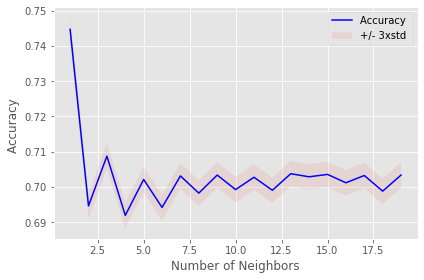

In [115]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors')
plt.tight_layout()
plt.show()

In [116]:
print( "The best accuracy was with the value", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with the value 0.7446875 with k= 1


#### Decision Tree

In [117]:
#create an instance of the DecisionTreeClassifier called LoanTree.
#specify criterion="entropy" so we can see the information gain of each node.
from sklearn.tree import DecisionTreeClassifier
AccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
AccidentTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
#fit the data with the training feature matrix X_train and training response vector y_train
AccidentTree.fit(X_train1,y_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [119]:
#Predictions on the testing dataset
predAccTree = AccidentTree.predict(X_test1)
yhat2 = predAccTree
yhat2
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test1, yhat2))

DecisionTrees's Accuracy:  0.70075


In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
DT_grid = { 'min_samples_split': [5,10, 20, 30, 40], 
          'max_features': [None, 'log2', 'sqrt']}
CV_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), DT_grid, verbose=1, cv=3)
CV_DT.fit(X_train1, y_train1)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   25.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [5, 10, 20, 30, 40], 'max_features': [None, 'log2', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

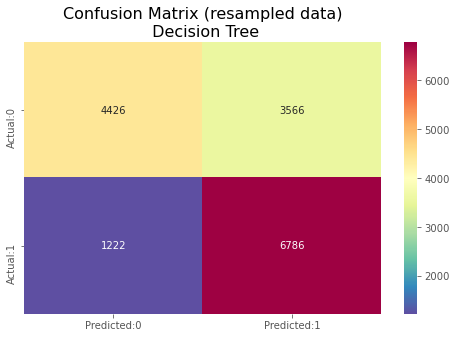

In [121]:
confmat = confusion_matrix(y_true=y_test1, y_pred = yhat2)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Spectral_r").set_title(
    "Confusion Matrix (resampled data)\n Decision Tree", fontsize=16)
plt.show()

In [ ]:
dot_data = StringIO()
filename = "predacctree.png"
featureNames = Features.columns[0:5]
targetNames =df_train["Severity4"].unique().tolist()
out=tree.export_graphviz(AccidentTree,feature_names=Features.columns, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(300, 600))
plt.imshow(img,interpolation='nearest')


In [ ]:
#Calculating Accuracy
from sklearn import metrics
print("Train set Accuracy of KNN: ", metrics.accuracy_score(y_train1, AccidentTree.predict(X_train1)))
print("Test set Accuracy of KNN: ", metrics.accuracy_score(y_test1, yhat1))

#### Feature Importance of Decision Tree

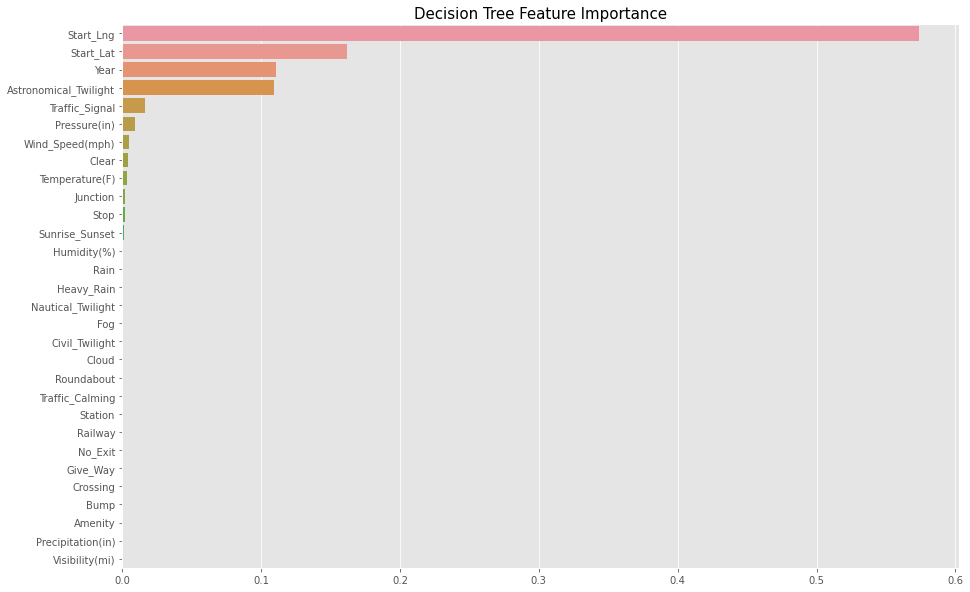

In [122]:
importances = pd.DataFrame(np.zeros((X_train1.shape[1], 1)), columns=['importance'], index=Features.columns)

importances.iloc[:,0] = AccidentTree.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Decision Tree Feature Importance', size=15)

plt.show()

#### SVM

In [123]:
#SVM with Radial basis function kernelling
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train1, y_train1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [125]:
#Predicting the values
yhat3 = SVM_model.predict(X_test1)
yhat3

array([1, 1, 1, ..., 0, 0, 0])

In [126]:
accuracy_train = SVM_model.score(X_train1, y_train1)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = SVM_model.score(X_test1,y_test1)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

Train Accuracy: 71.4%
Test Accuracy: 70.4%


#### Logistic Regression

In [127]:
#Train And Test Data splitup Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train1,y_train1)
LR
#Prediction
yhat4 = LR.predict(X_test1)
yhat4

array([1, 1, 1, ..., 0, 0, 0])

In [128]:
accuracy_train = LR.score(X_train1, y_train1)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
accuracy_test = LR.score(X_test1,y_test1)
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

Train Accuracy: 67.0%
Test Accuracy: 66.9%


#### Random Forest

In [129]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({2:1, 1:15, 0:50})
rdf = RandomForestClassifier(n_estimators=300,random_state=35)

rdf.fit(X_train1,y_train1)

y_pred=rdf.predict(X_test1)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test1, y_pred))  
print(classification_report(y_test1, y_pred))

Accuracy: 0.8200625
[[6163 1829]
 [1050 6958]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      7992
           1       0.79      0.87      0.83      8008

   micro avg       0.82      0.82      0.82     16000
   macro avg       0.82      0.82      0.82     16000
weighted avg       0.82      0.82      0.82     16000



In [130]:
f = lambda x: 1 if x>=0.5 else 0
train_pred = np.array(list(map(f, rdf.predict(X_train1))))
test_pred = np.array(list(map(f, rdf.predict(X_test1))))

rdf_train_accuracy = accuracy_score(y_train1, train_pred)
print("Train Accuracy: %.1f%%"% (rdf_train_accuracy*100))
rdf_test_accuracy = accuracy_score(y_test1, test_pred)
print("Test Accuracy: %.1f%%"% (rdf_test_accuracy*100))

Train Accuracy: 100.0%
Test Accuracy: 82.0%


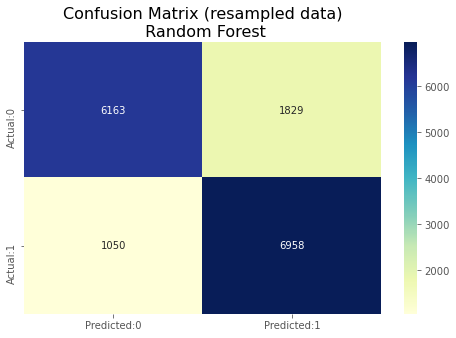

In [131]:
confmat = confusion_matrix(y_true=y_test1, y_pred=test_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (resampled data)\n Random Forest", fontsize=16)
plt.show()

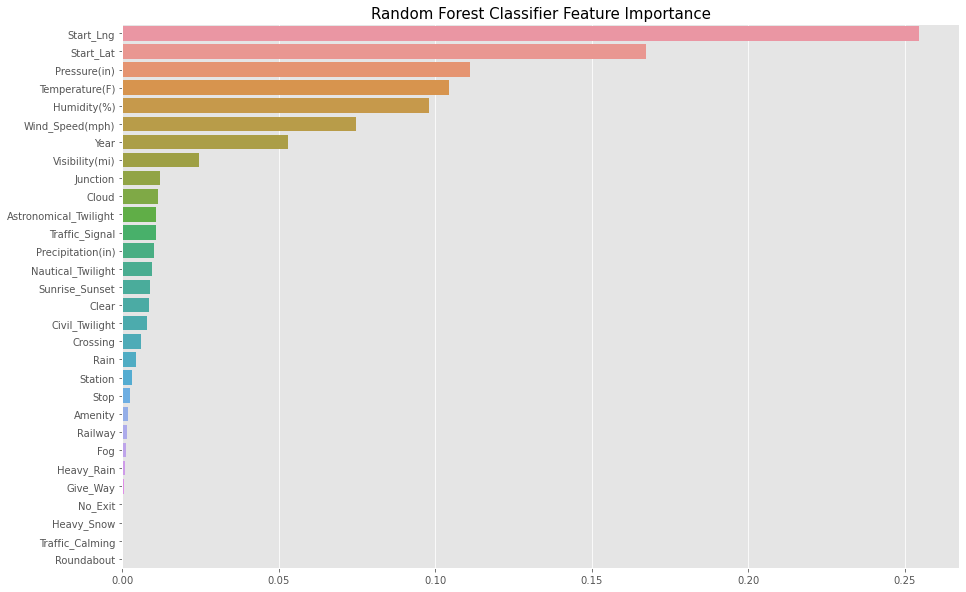

In [132]:
importances = pd.DataFrame(np.zeros((X_train1.shape[1], 1)), columns=['importance'], index=Features.columns)

importances.iloc[:,0] = rdf.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()